<a href="https://colab.research.google.com/github/ElZho/ElZho/blob/main/Find_Froud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import datetime
import gc

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

#Выгрузка из Kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!kaggle competitions download -c ieee-fraud-detection -p kaggle/

  0% 0.00/3.21M [00:00<?, ?B/s]
100% 3.21M/3.21M [00:00<00:00, 28.1MB/s]
 87% 51.0M/58.3M [00:01<00:00, 52.4MB/s]
100% 58.3M/58.3M [00:01<00:00, 53.8MB/s]
  0% 0.00/3.26M [00:00<?, ?B/s]
100% 3.26M/3.26M [00:00<00:00, 38.0MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 228MB/s]
 84% 44.0M/52.2M [00:02<00:00, 15.2MB/s]
100% 52.2M/52.2M [00:02<00:00, 22.6MB/s]


In [ ]:
!unzip data-science-for-good.zip

unzip:  cannot find or open data-science-for-good.zip, data-science-for-good.zip.zip or data-science-for-good.zip.ZIP.


In [ ]:
path_to_data = '/content/kaggle/test_identity.csv.zip'
test_ident = pd.read_csv(path_to_data)
test_ident.head()

In [ ]:
path_to_data = '/content/kaggle/test_transaction.csv.zip'
test_transaction = pd.read_csv(path_to_data)


In [ ]:
path_to_data = '/content/kaggle/train_identity.csv.zip'
train_identity = pd.read_csv(path_to_data)
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
path_to_data = '/content/kaggle/train_transaction.csv.zip'
train_transaction = pd.read_csv(path_to_data)

In [ ]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Выгрузка на Google disk

Так как объем данных очень большой, то сохраним их на диске

In [ ]:
#data_test.to_csv('/content/drive/MyDrive/Classroom/data_test_isFraud_31_01.csv', index=False)

In [ ]:
#data_train_full.to_csv('/content/drive/MyDrive/Classroom/data_train_full_isFraud_31_01.csv', index=False)

In [ ]:
#data_train.to_csv('/content/drive/MyDrive/Classroom/data_train_isFraud_31_01.csv', index=False)

In [ ]:
#data_test_short.to_csv('/content/drive/MyDrive/Classroom/data_test_short_isFraud_31_01.csv', index=False)

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_test_isFraud_31_01.csv'
data_test = pd.read_csv(path_to_data)
data_test.head()

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_isFraud_31_01.csv'
data_train = pd.read_csv(path_to_data)
data_train.head()

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_31_01.csv'
data_train_full = pd.read_csv(path_to_data)
data_train_full.head()

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_test_short_isFraud_31_01.csv'
data_test_short = pd.read_csv(path_to_data)
data_test_short.head()

In [ ]:
data_train.head()

In [ ]:
data_test.head()

# Описание

Categorical Features  - Transaction
* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9
Categorical Features - Identity
* DeviceType
* DeviceInfo
* id_12 - id_38

Transaction Table *

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

* TransactionAMT: transaction payment amount in USD
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category,  issue bank, country, etc.
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
* D1-D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features:
* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

Identity Table *

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
* DeviceType
* DeviceInfo
* id_12 - id_38

https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

#Исследуем данные

## Корреляция

In [ ]:
correlations_data = data_train.corr()['isFraud'].sort_values()

In [ ]:
# Голова массива - минимальная корреляция
print(correlations_data.head(15), '\n')

# Хвост - максимальная корреляция
print(correlations_data.tail(15))

D5      -0.147260
D8      -0.142636
D7      -0.129077
id_01   -0.120099
D2      -0.102215
id_07   -0.084768
D10     -0.072737
V150    -0.064043
D15     -0.063428
V159    -0.062742
V160    -0.062408
V145    -0.062063
D6      -0.061721
V151    -0.060958
id_04   -0.059701
Name: isFraud, dtype: float64 

V30    NaN
V35    NaN
V36    NaN
V48    NaN
V49    NaN
V53    NaN
V54    NaN
V69    NaN
V70    NaN
V75    NaN
V76    NaN
V90    NaN
V91    NaN
V107   NaN
V305   NaN
Name: isFraud, dtype: float64


## Графики

In [ ]:
feature_label_norm_long

['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31', 'id_33', 'DeviceInfo']

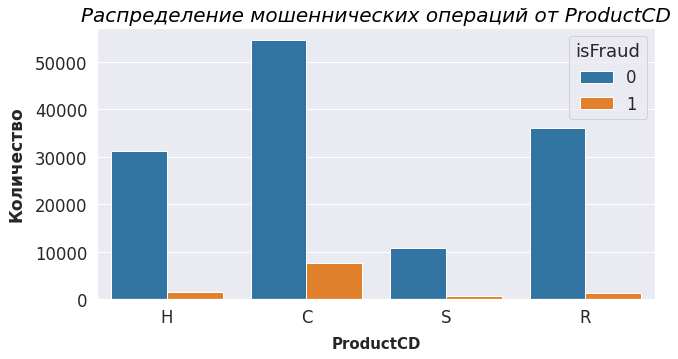

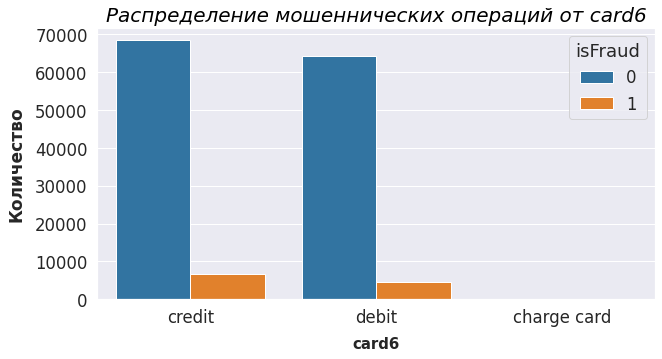

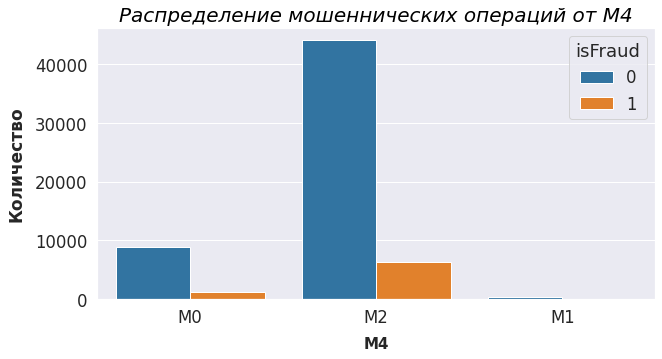

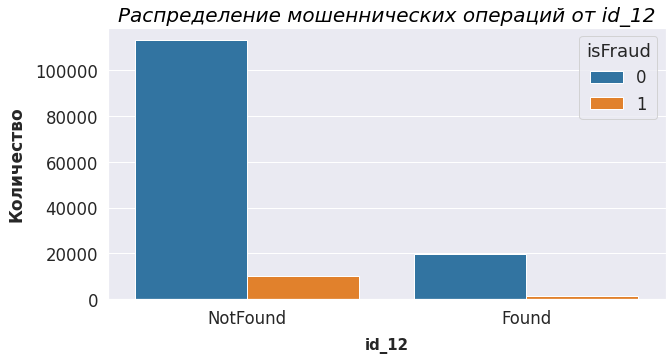

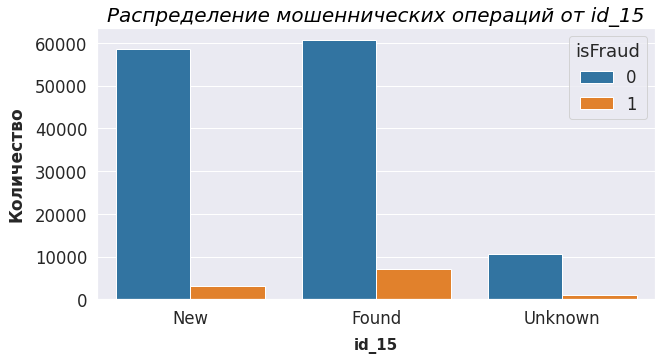

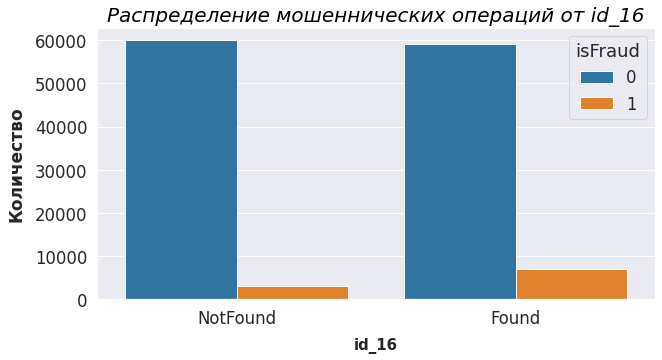

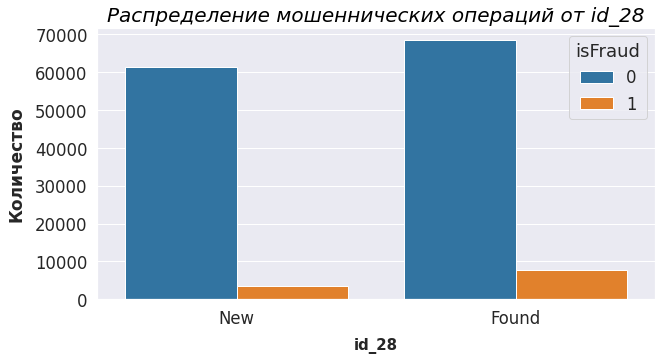

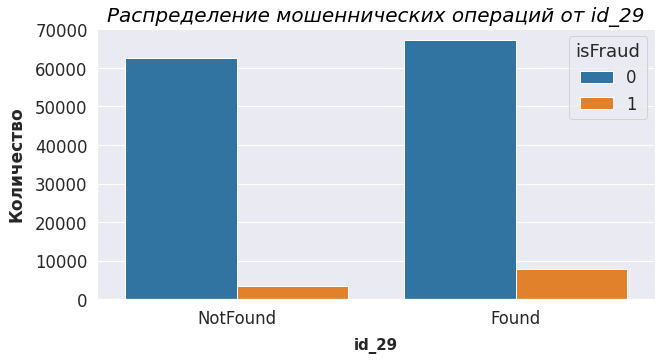

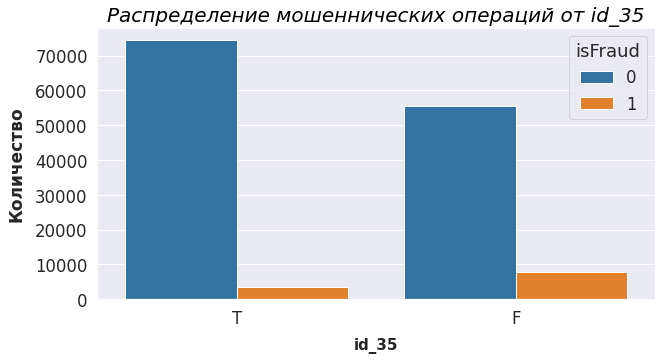

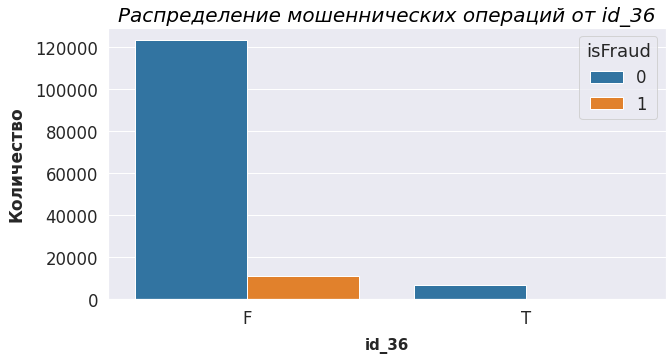

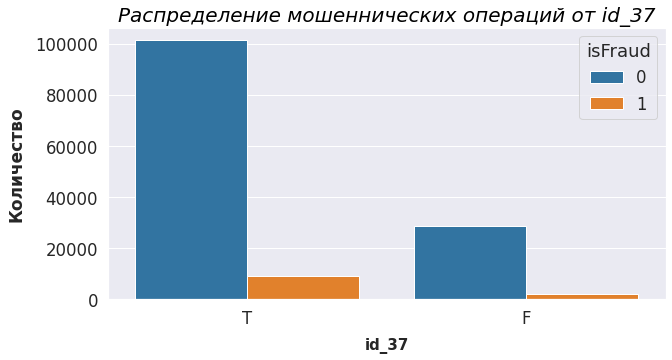

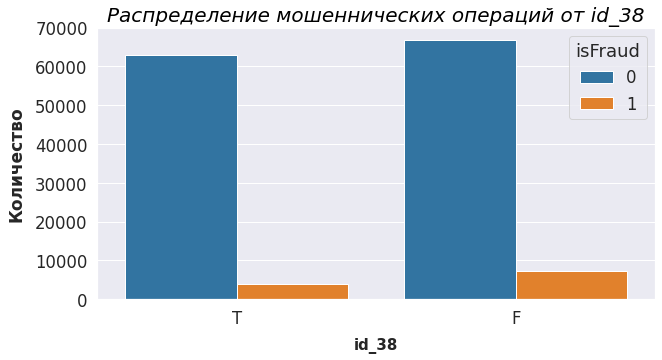

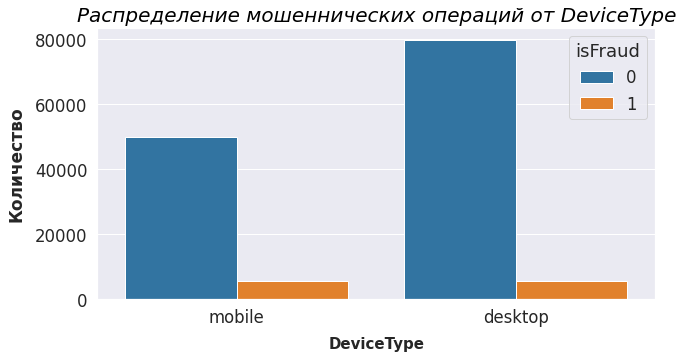

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
    for feat in features_cat_norm:
      plt.figure(figsize=(10, 5))
      ax = sns.countplot(x=feat, hue="isFraud", data=data_train)
      plt.title( f'Распределение мошеннических операций от {feat}',
           
              fontsize=20, fontstyle='oblique',color='black', fontweight='medium')
      ax.set_xlabel(feat, labelpad=10, fontsize = 15, fontweight='bold')
      ax.set_ylabel('Количество', labelpad=10,fontsize = 17, fontweight='bold')
      plt.show()
      plt.close()

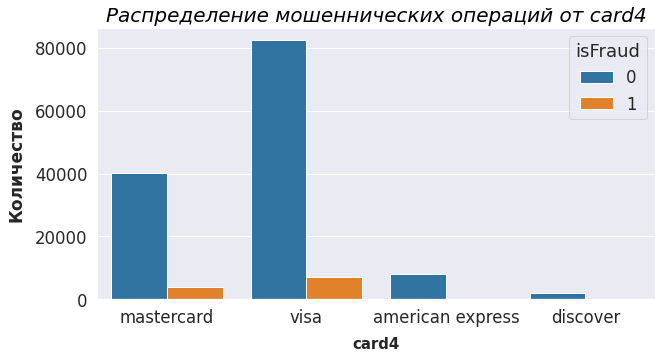

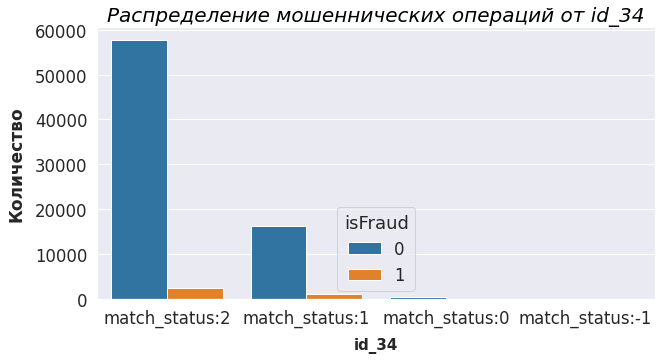

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
    for feat in feature_label_norm_ok:
      plt.figure(figsize=(10, 5))
      ax=sns.countplot(data=data_train, x=feat, hue='isFraud')
      plt.title( f'Распределение мошеннических операций от {feat}',
           
              fontsize=20, fontstyle='oblique',color='black', fontweight='medium')
      ax.set_xlabel(feat, labelpad=10, fontsize = 15, fontweight='bold')
      ax.set_ylabel('Количество', labelpad=10,fontsize = 17, fontweight='bold')
      plt.show()
      plt.close()

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
    for feat in feature_label_norm_long:
      plt.figure(figsize=(45, 10))
      
      ax=sns.countplot(data=data_train, x=feat, hue='isFraud')
      plt.title( f'Распределение мошеннических операций от {feat}',
           
              fontsize=20, fontstyle='oblique',color='black', fontweight='medium')
      ax.set_xlabel(feat, labelpad=10, fontsize = 15, fontweight='bold')
      ax.set_ylabel('Количество', labelpad=10,fontsize = 17, fontweight='bold')
      plt.show()
      plt.close()

In [ ]:
def plot_heat(data, title, lab_x, size=(10,10)):
  #plot chart
  plt.figure(figsize=size)

  # set colour
  palette=plt.get_cmap("YlGnBu").reversed()

  #set parametrs of annotation
  annot = {'fontdict' :{'fontsize' :15},'rotation':90}
  #plot
  sns.set(font_scale=1.5)
  ax=sns.heatmap(data, annot=True, cmap=palette, fmt=".0f", annot_kws = annot)

  plt.title(title
              ,fontsize=25, fontstyle='oblique',color='black', fontweight='medium')


  ax.set_xlabel(lab_x, labelpad=10, fontsize = 17, fontweight='bold')
  ax.set_ylabel('isFraud', labelpad=10,fontsize = 17, fontweight='bold')

In [ ]:
data_graf=data_train.groupby(['isFraud', 'DeviceType'])['TransactionAmt'].mean().unstack()

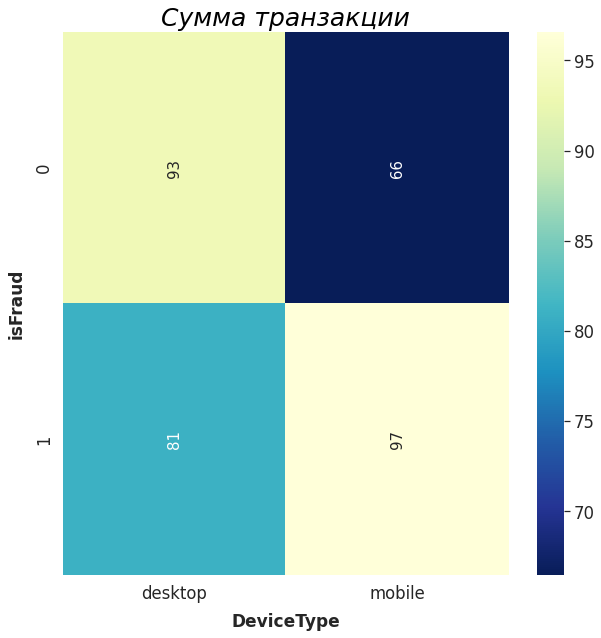

In [ ]:
plot_heat(data=data_graf, title='Сумма транзакции', lab_x='DeviceType')

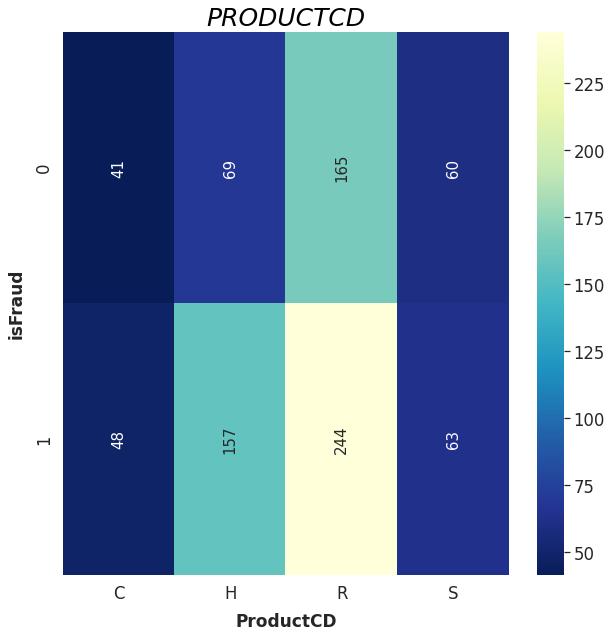

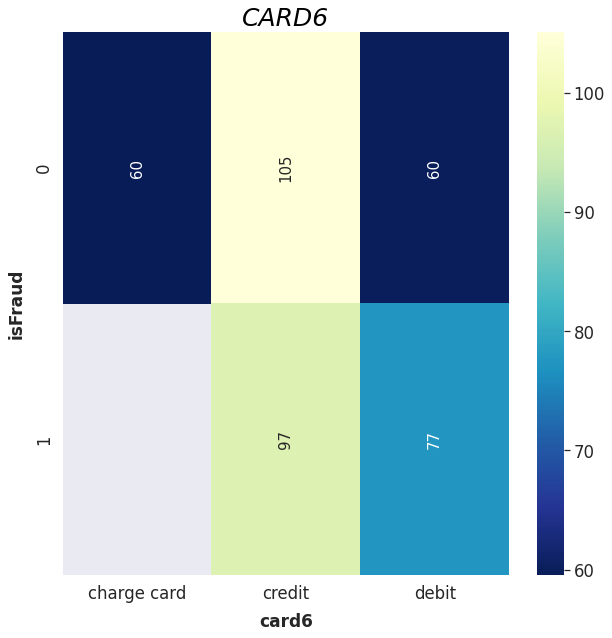

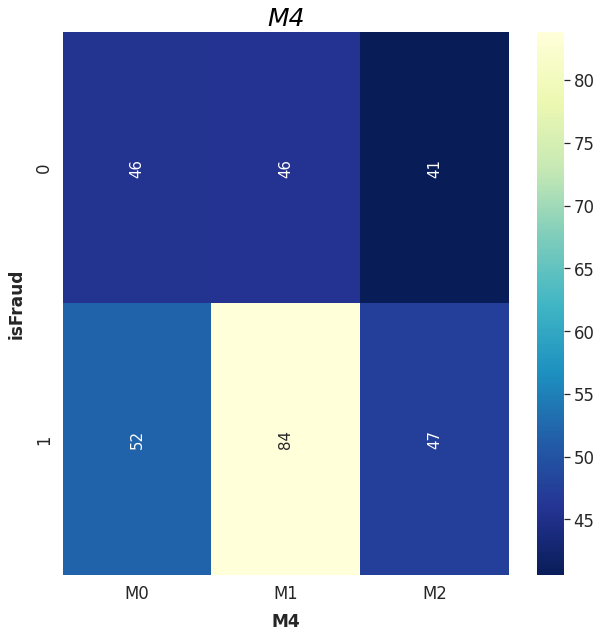

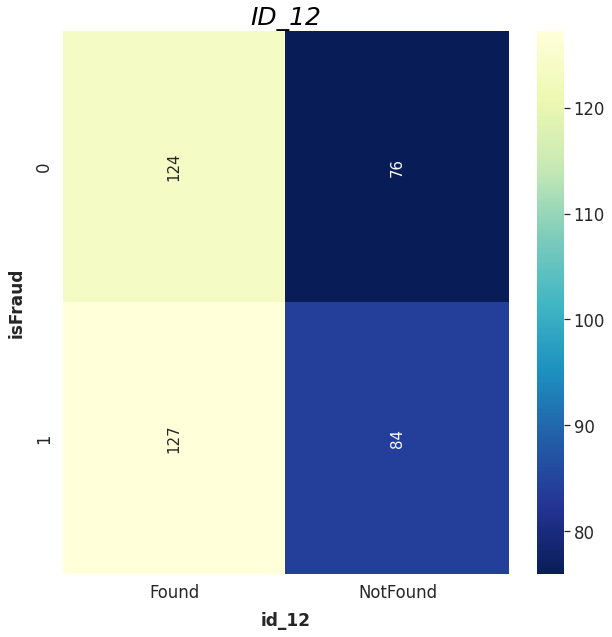

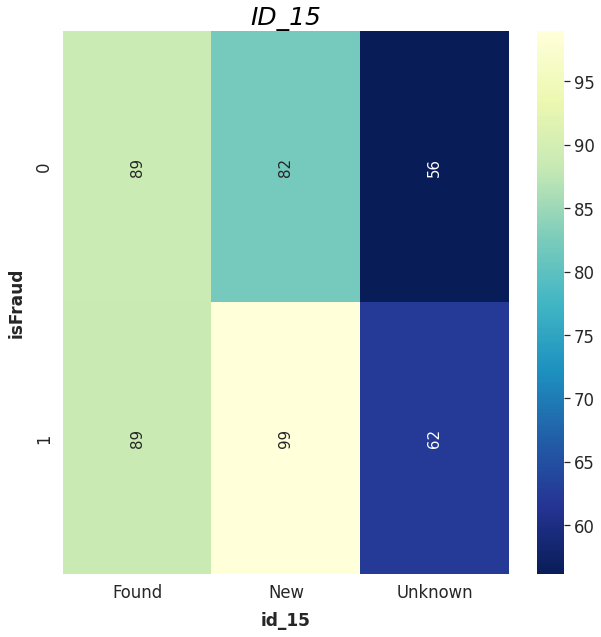

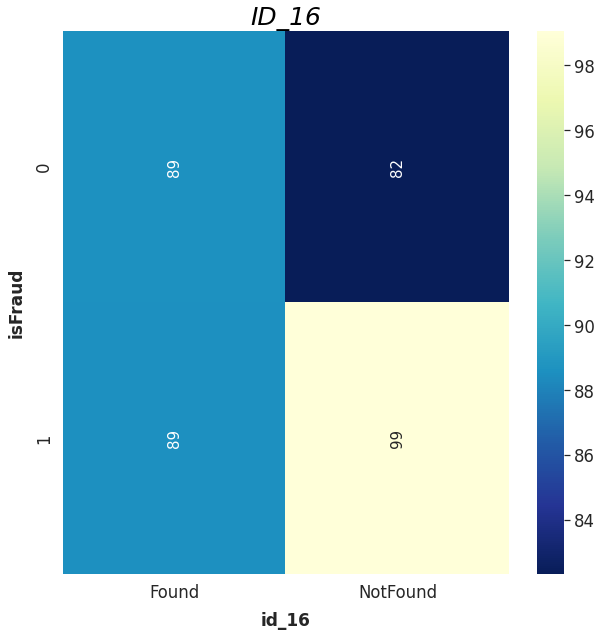

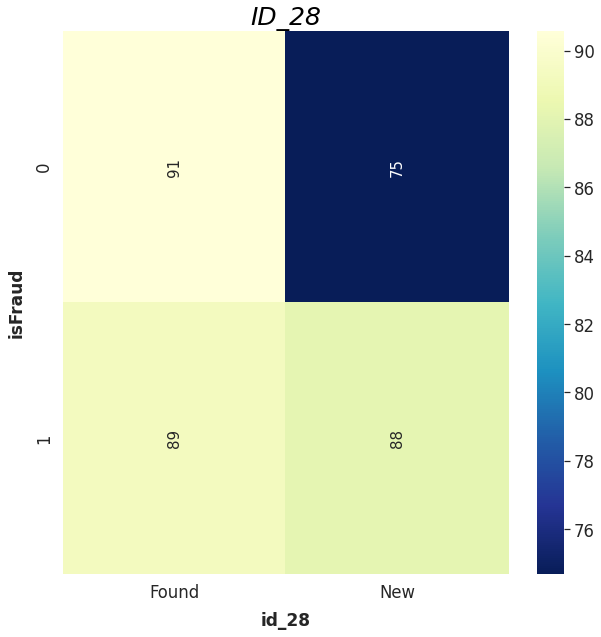

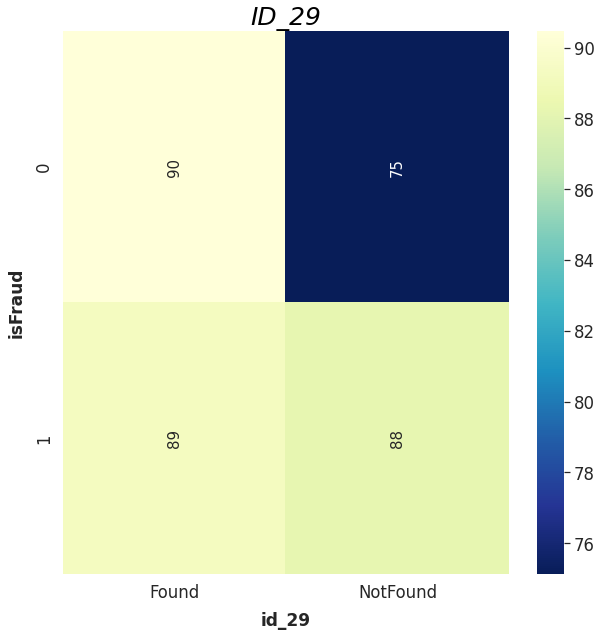

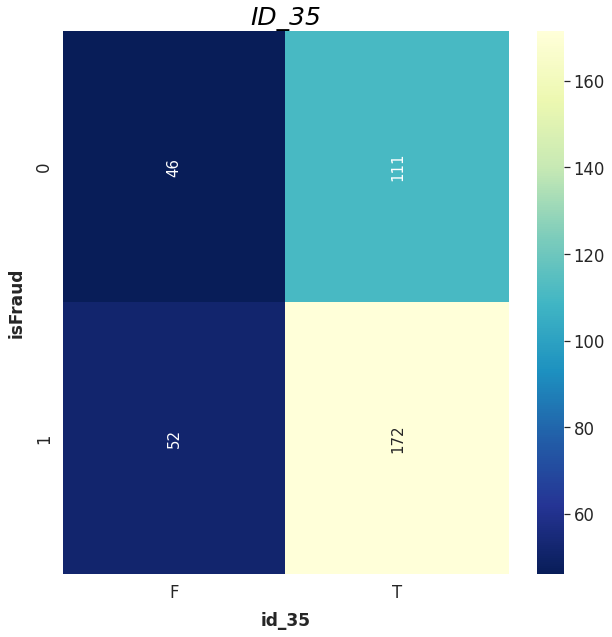

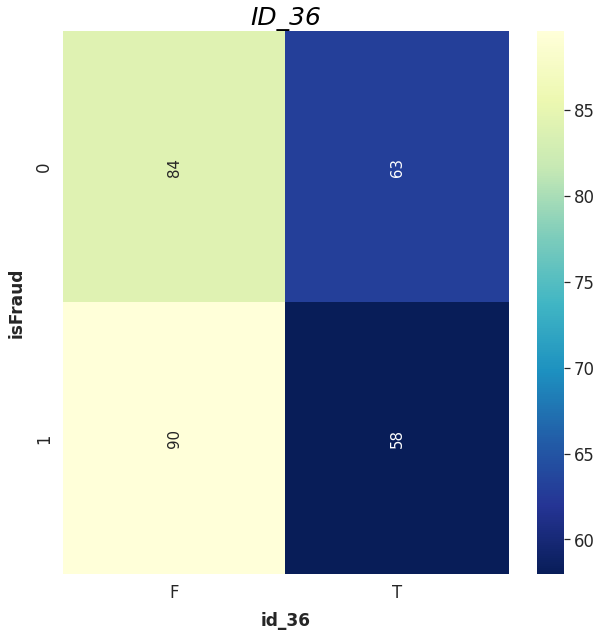

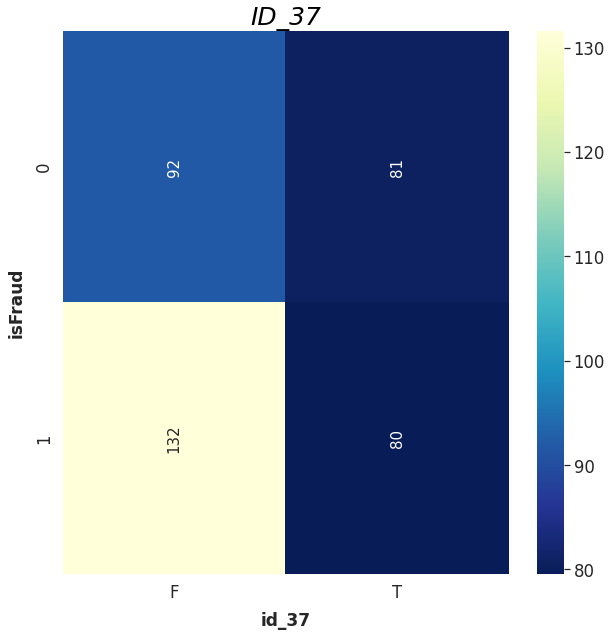

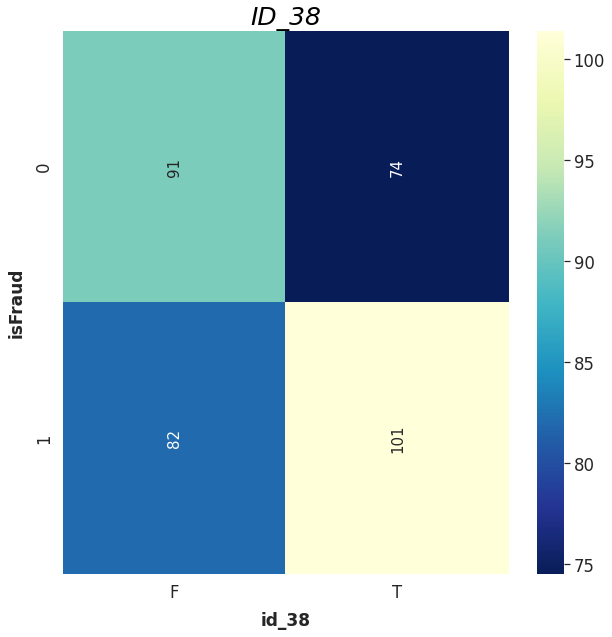

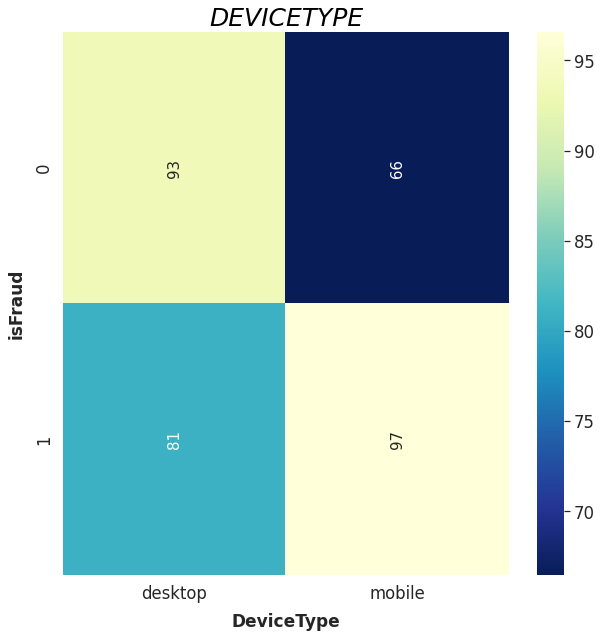

In [ ]:
for feat in features_cat_norm:
  col=['isFraud', feat]
  data_graf=data_train.groupby(col)['TransactionAmt'].mean().unstack()
  plot_heat(data=data_graf, title=feat.upper(), lab_x=feat)


#Работа с фичами после первого прохода

## Инициализация фичей

Фичи не содержащие полезных данных. Данных меньше 95% от всего объема

In [ ]:
feat_out= ['id_07', 'id_08', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
          'id_23',  'id_27']

Все фичи разбитые по смыслу

In [ ]:
addr_feature=['addr1', 'addr2']
card_feature=['card1', 'card2','card3', 'card4', 'card5', 'card6']
identity_feature= ['id_12','id_13', 'id_14', 'id_15', 'id_16', 'id_17',
                  'id_18', 'id_19', 'id_20', 'id_21', 'id_22',               
                  'id_23', 'id_27', 'id_28', 'id_29', 
                  'id_30', 'id_31', 'id_33', 'id_34',
                  'id_35', 'id_36', 'id_37', 'id_38']

In [ ]:
features_cat_itog=['ProductCD', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo']
features_cat_itog=features_cat_itog+addr_feature+card_feature+identity_feature

In [ ]:
feature_m=['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [ ]:
features_cat_itog=features_cat_itog+feature_m

In [ ]:
numeric_features_itog=['TransactionID', 'TransactionDT', 'TransactionAmt', 'dist1',
                  'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
                  'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
                  'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
                  'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                  'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
                  'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
                  'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
                  'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45',
                  'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54',
                  'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63',
                  'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',
                  'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
                  'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90',
                  'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99',
                  'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107',
                  'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115',
                  'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123',
                  'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131',
                  'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139',
                  'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
                  'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155',
                  'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163',
                  'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171',
                  'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179',
                  'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187',
                  'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
                  'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203',
                  'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211',
                  'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
                  'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227',
                  'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235',
                  'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243',
                  'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251',
                  'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259',
                  'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267',
                  'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275',
                  'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283',
                  'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291',
                  'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299',
                  'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307',
                  'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315',
                  'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323',
                  'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331',
                  'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/feature_import_01_02.csv'
feature_imortans_second = pd.read_csv(path_to_data)
feature_imortans_second.head()

,feature,importance
0,card1,6.793614
1,TransactionAmt,4.716888
2,addr1,4.192885
3,C13,3.768942
4,card2,3.475234


In [ ]:
feature_imortans_second.query('importance==0').feature

324       V1
325       V9
326      V17
327      V18
328      V21
       ...  
419     V329
420     V330
421     V333
422     V335
423    id_10
Name: feature, Length: 100, dtype: object

##Анализ фичей

In [ ]:
data_train_full['addr1'].value_counts()

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
         ...  
462.0        1
128.0        1
481.0        1
120.0        1
340.0        1
Name: addr1, Length: 332, dtype: int64

In [ ]:
data_train_full['addr2'].value_counts()

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
55.0         1
79.0         1
49.0         1
50.0         1
70.0         1
Name: addr2, Length: 74, dtype: int64

Проанализируем addr2

In [ ]:
adr2_analyse=data_train_full.groupby(['isFraud','addr2']).TransactionID.count().unstack()

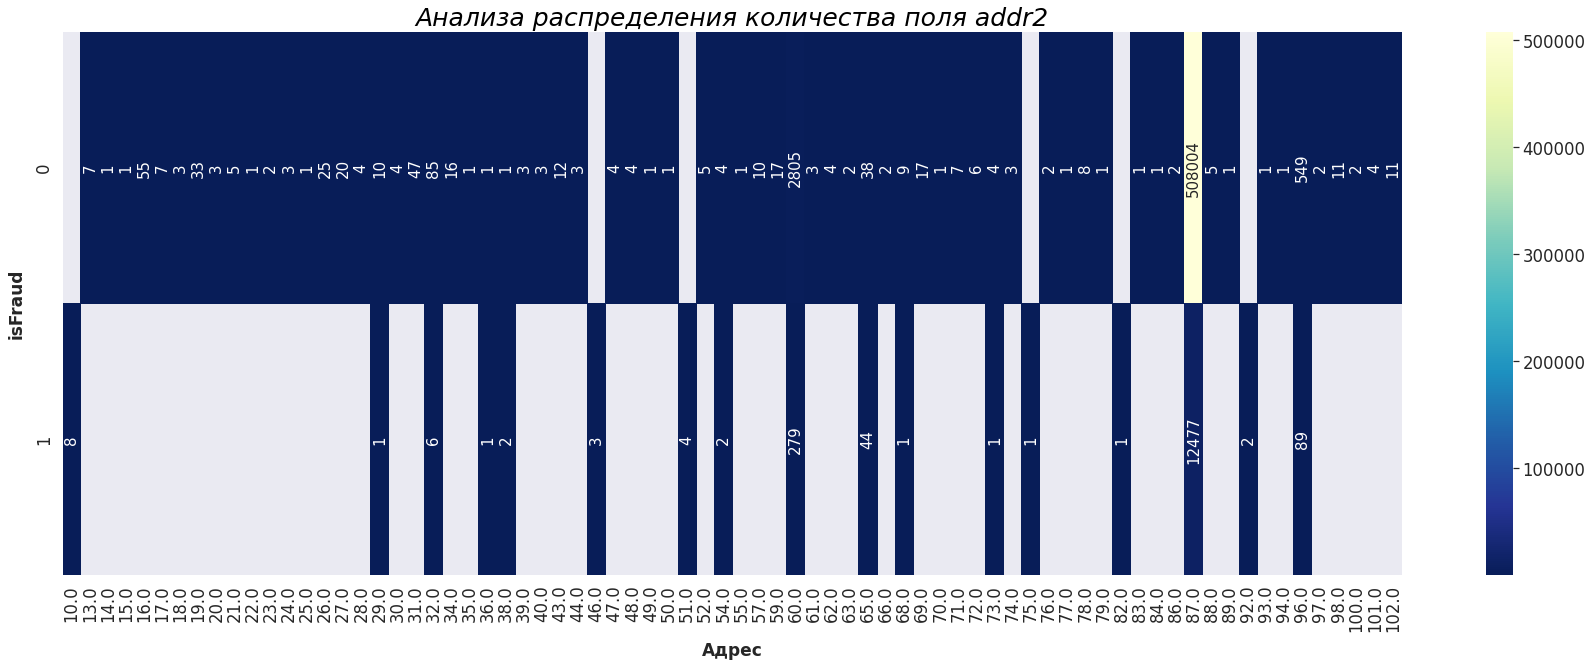

In [ ]:
plot_heat(adr2_analyse, title='Анализа распределения количества поля addr2', lab_x='Адрес', size=(30,10))

Из графика видно, что 88% всех операций выполнено с одного addr2, еще 5% с другого addr2. Остальные встречаются в единичных случаях.. Вероятно addr2 обозначает страну операции. Вероятно самая часто встречающаяся страна addr2 - Россия, другая - Белоруссия.

In [ ]:
data_train_full[data_train_full['dist1']<=8]['dist1'].shape[0]/data_train_full[~data_train_full['dist1'].isna()].shape[0]

0.5035275256118085

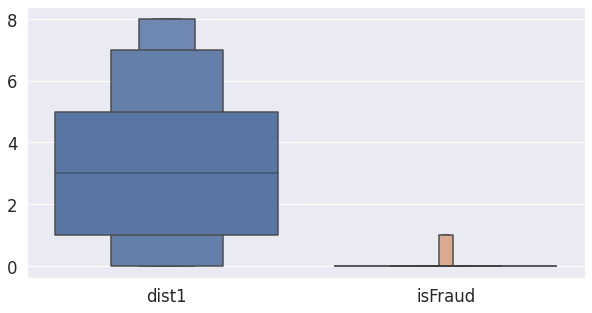

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
      plt.figure(figsize=(10, 5))
      data=data_train_full[data_train_full['dist1']<=8][['dist1', 'isFraud']]
      ax=sns.boxenplot(data=data)

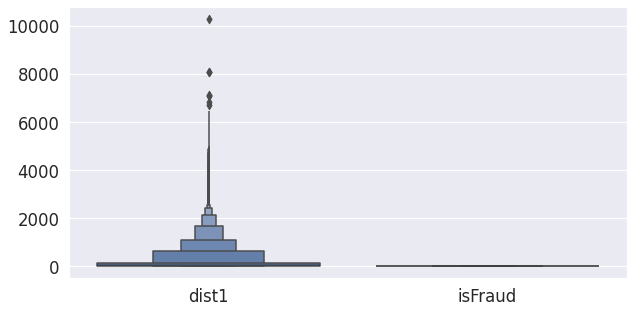

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
      plt.figure(figsize=(10, 5))
      data=data_train_full[data_train_full['dist1']>=8][['dist1', 'isFraud']]
      ax=sns.boxenplot(data=data)

Половина часть значений dist1 лежит меньше 8, и в этом диапазоне располагается между 2 и 4. Причем мощеннические лежат в области от 0 до 1

Проанализируем dist2'

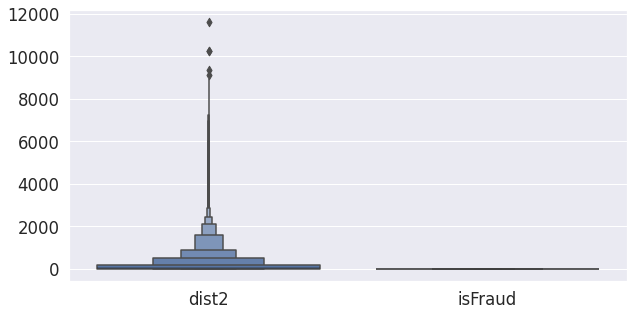

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
      plt.figure(figsize=(10, 5))
      ax=sns.boxenplot(data=data_train_full[['dist2', 'isFraud']])

Посмотрим еще как распределяются суммы от времени и от типа операции

In [ ]:
data=data_train_full[['TransactionDT', 'TransactionAmt', 'isFraud']]
data=data[data['TransactionAmt']<30000]

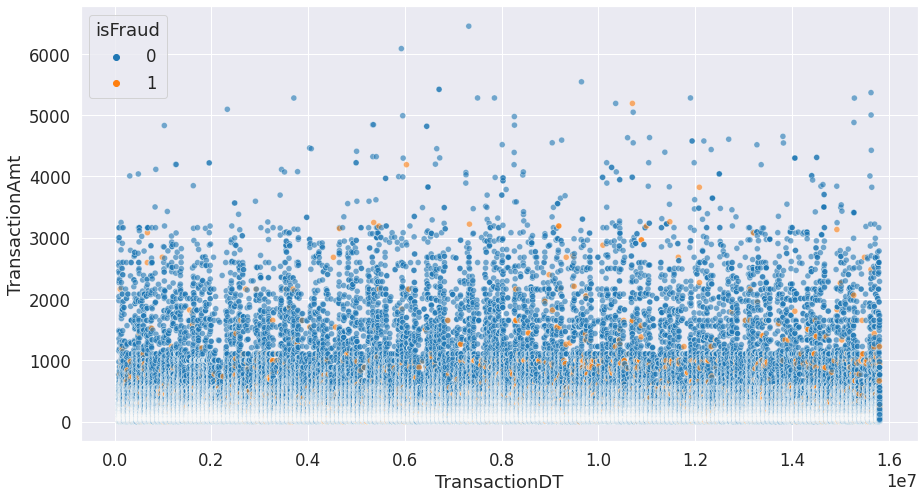

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
    plt.figure(figsize=(15, 8))
    ax=sns.scatterplot(x='TransactionDT', y='TransactionAmt',\
                data=data,\
                hue='isFraud', alpha=0.6)

Что можно отметить. Частота мошеннических операций пропорционально частоте операций по суммам, т.е. операции с мелкими суммами встречаются чаще чем с круными, но появление мошеннической операции равновероятно как в группе операций с суммами до 1000 у.е., так и в группах 1000-2000 у.е., 2000-3000 у.е. и т.д.

In [ ]:
feature_imortans_second[feature_imortans_second['feature']=='TransactionID']

,feature,importance
8,TransactionID,2.526003


##Подготовка данных

## Подготовка данных из первичных трейна и теста из гугл

In [ ]:
data_all.shape, data_train.shape, data_test.shape

In [ ]:
features_norm=(feature_label_norm+features_cat_norm+numeric_features_norm)


In [ ]:
X=data_train_full.drop(columns=feat_out)
X.dropna(how='all', inplace=True)

In [ ]:
X.shape

(590540, 425)

In [ ]:
y=X['isFraud']
X=X.drop(['isFraud'], axis=1)

In [ ]:
y.shape, X.shape

((590540, 1), (590540, 424))

In [ ]:
X_test=data_test.drop(columns=feat_out)


In [ ]:
f=features_norm.copy()
f.remove('isFraud')
X_test=data_test[f].copy()

In [ ]:
del data_train_full
gc.collect()

44

сохранение подготовленных наборов на диске

In [ ]:
X.to_csv('/content/drive/MyDrive/Classroom/X_isFraud_01_02.csv', index=False)
y.to_csv('/content/drive/MyDrive/Classroom/y_isFraud_01_02.csv', index=False)

In [ ]:
X_test.to_csv('/content/drive/MyDrive/Classroom/X_test_isFraud_01_02.csv', index=False)

## Подготовка данных из предварительно сохраненных на диске предподготовленных. Удаление лишних колонок преобразование

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/X_isFraud_01_02.csv'
X = pd.read_csv(path_to_data)

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/y_isFraud_01_02.csv'
y = pd.read_csv(path_to_data)

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/X_test_isFraud_01_02.csv'
X_test = pd.read_csv(path_to_data)

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/list_off_02_02.csv'
list_off= pd.read_csv(path_to_data)

In [ ]:
X.shape, X_test.shape, y.shape

((590540, 359), (506691, 359), (590540, 1))

In [ ]:
X.columns==X_test.columns

In [ ]:
column_to_int=['addr1', 'addr2', 'card2', 'card3', 'id_13','card5', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20']

In [ ]:
for col in column_to_int:
  if X[col].dtype==np.float:
    X[col]=X[col].apply(lambda x: '{0:.0f}'.format(x))
  if X_test[col].dtype==np.float:
    X_test[col]=X_test[col].apply(lambda x: '{0:.0f}'.format(x))

In [ ]:
f=features_cat_itog.copy()
for col in feat_out:
  if col in f:
    f.remove(col)

In [ ]:
for col in f:
  X[col].replace('nan', ' ', inplace=True)
  X_test[col].replace('nan', ' ', inplace=True)

In [ ]:
for col in f:
  X[col].fillna(' ', inplace=True)
  X_test[col].fillna(' ', inplace=True)

Удаляем фичи list_off - это фичи не влияющие на результат по первым прогонам и имеющие высокую корреляцию

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/X_isFraud_02_02.csv'
X = pd.read_csv(path_to_data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/X_test_isFraud_02_02.csv'
X_test = pd.read_csv(path_to_data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ID=X_test['TransactionID']

In [ ]:
X=X.drop(columns=list_off.feature.values)

In [ ]:
X_test.drop(columns=list_off.feature.values, inplace=True)

In [ ]:
X=X.drop(columns=['TransactionID'])

In [ ]:
X_test=X_test.drop(columns=['TransactionID'])

In [ ]:
X.shape, X_test.shape

((590540, 355), (506691, 355))

Добавляем столбцы, где объединяем карты в одну строку, расстояние и адрес

In [ ]:
X['card_card']=X['card1'].astype(str)+\
                             X['card2'].astype(str) +\
                             X['card3'].astype(str)+\
                             X['card4']+X['card6']+\
                             X['card5'].astype(str)

In [ ]:
X_test['card_card']=X_test['card1'].astype(str)+\
                             X_test['card2'].astype(str) +\
                             X_test['card3'].astype(str)+\
                             X_test['card4']+X_test['card6']+\
                             X_test['card5'].astype(str)

In [ ]:
X['dist']=X['dist1'].astype(str)+X['dist2'].astype(str) 

In [ ]:
X_test['dist']=X_test['dist1'].astype(str)+X_test['dist2'].astype(str) 

In [ ]:
X['addr']=X['addr1'].astype(str)+X['addr2'].astype(str) 

In [ ]:
X_test['addr']=X_test['addr1'].astype(str)+X_test['addr2'].astype(str) 

#CatBoost

In [ ]:
!pip install -q catboost shap

     |████████████████████████████████| 76.1 MB 59.1 MB/s 
     |████████████████████████████████| 564 kB 62.7 MB/s 


In [ ]:
import catboost
from catboost import CatBoostRegressor

import shap
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y,
                                              test_size=0.25, random_state=42)

In [ ]:
f.extend(['card_card', 'dist', 'addr'])

In [ ]:
train_pool = catboost.Pool(
    X_train,
    label=y_train,
    cat_features=f
)
val_pool = catboost.Pool(
    X_validate,
    label=y_validate,
    cat_features=f
)
test_pool = catboost.Pool(
    X_test,
    cat_features=f
)

In [ ]:
del X
gc.collect()

In [ ]:
!rm -rf 'catboost_clf_find_fraud/snapshot.bkp'

In [ ]:
catboost_train_dir = 'catboost_clf_find_fraud'
clf = catboost.CatBoostClassifier(
    eval_metric='AUC',
    od_pval=0.05,
    od_wait=20,
    # early_stopping_rounds=20,
    random_seed=52,
    train_dir=catboost_train_dir,
    task_type='CPU',
    # task_type='GPU',
    # devices='0',
    auto_class_weights='Balanced',
    use_best_model=True
)
clf.fit(
    train_pool, 
    eval_set=val_pool,
    plot=True,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
)

In [ ]:
vt_pool = catboost.Pool(
    X_validate,
    cat_features=f
    )  

tt_pool = catboost.Pool(
    X_train,
    cat_features=f
) 
y_pred_train = clf.predict(tt_pool)
y_pred_val = clf.predict(vt_pool)
y_pred_submit = clf.predict(test_pool)

Сохраняем результат сразу же

In [ ]:
y_pred_submit_res=pd.DataFrame(ID, y_pred_submit, columns=['TransactionID' ,'isFraud'])

In [ ]:
y_pred_submit_res=pd.DataFrame(pd.concat([ID, y_pred_submit], axis=1), columns=['TransactionID' ,'isFraud'])

In [ ]:
y_pred_submit_res.to_csv('/content/drive/MyDrive/Classroom/submit_isFraud_02_02_try3.csv', index=False)

График 4-го обучения

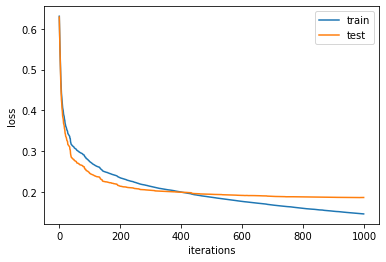

In [ ]:
hist = clf.get_evals_result()
plt.plot(list(hist['learn'].values())[0], label= 'train')
plt.plot(list(hist['validation'].values())[0], label = 'test')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend()
plt.show()

In [ ]:
feature_import=sorted(
    zip(X_train.columns, clf.feature_importances_), 
    key=lambda p: p[1], 
    reverse=True
)

In [ ]:
shap_info = clf.get_feature_importance(
    data=train_pool, 
    type='ShapValues', 
    verbose=10000
)
shap_values = shap_info[:,:-1]
base_values = shap_info[:,-1]

Feature importance

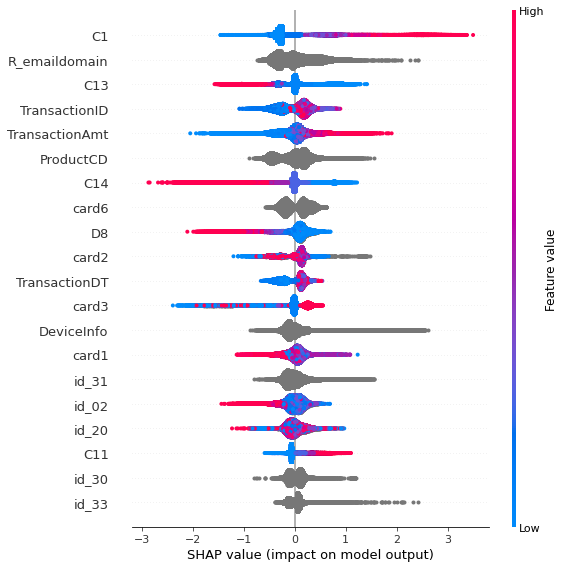

In [ ]:
shap.summary_plot(shap_values, X_train)

Что попробовать:
* Другую модель lightGBM
* Поработать со временем. Разбить на группы. Превратить время в реальные даты. Выделить часы, дни, посмотреть, что влияет
* Разбить суммы на группы. Здесь вредя ли что найдешь, но для презы пригодиться.
* Поудалять еще фичи, которые не влияют.